In [1]:
import numpy as np
import tensorflow as tf

In [2]:
def sigmoid(x): 
    z = np.clip( x, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [3]:
x = np.array([200,17])

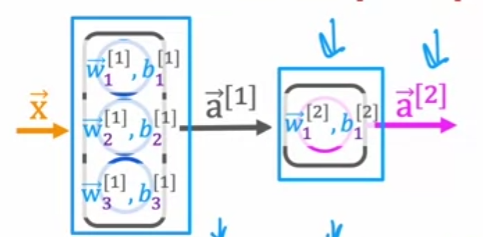

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="sample_NN.png")

In [5]:
#with w1_1 -> weight of first layer's first node
#with w1_2 -> weight of first layer's second node etc

#a1_1 = g(w1_1 • x + b1_1)
w1_1 = np.array([1,2])
b1_1 = np.array([-1])
z1_1 =np.dot(w1_1,x)+b1_1
a1_1 = sigmoid(z1_1)

#a1_2 = g(w1_2 • x + b1_2)
w1_2 = np.array([-3,4])
b1_2 = np.array([1])
z1_2 =np.dot(w1_2,x)+b1_2
a1_2 = sigmoid(z1_2)

#a1_3 = g(w1_3 • x + b1_3)
w1_3 = np.array([5,-6])
b1_3 = np.array([2])
z1_3 =np.dot(w1_3,x)+b1_3
a1_3 = sigmoid(z1_3)

print([a1_1,a1_2,a1_3])

[array([1.]), array([7.12457641e-218]), array([1.])]


In [6]:
#a2_1 = g(w1_1 • x + b1_1)
a1=[a1_1,a1_2,a1_3]

w2_1 = np.array([-7,8,9])
b2_1 = np.array([3])
z2_1 =np.dot(w2_1,a1)+b2_1
a2_1 = sigmoid(z2_1)

a2_1

array([0.99330715])

In [7]:
def dense(a_input, W, b, g):
    units = W.shape[1]  # pulling out number of hidden units or number of units in this layer
    a_output = np.zeros(units)
    for j in range(units):
        w = W[:,j]  #[row,col]
        z = np.dot(w,a_input) + b[j]
        a_output[j] = g(z)
    return a_output


In [8]:
def sample_seq(x, W, b):
    a_1 = dense(x, W[0], b[0], sigmoid)
    a_2 = dense(a1, W[1], b[1],sigmoid)
    return a_2

In [13]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

W = [W1_tmp, W2_tmp]
b = [b1_tmp, b2_tmp]

In [10]:
sample_seq([231.01,  14.41],W,b) 

C:\Users\sharl\AppData\Local\Temp\ipykernel_10224\1894763875.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_output[j] = g(z)


array([1.02458428e-21])

In [11]:
norm_l = tf.keras.layers.Normalization(axis=-1)

In [12]:
def predict(X, W, b):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = sample_seq(X[i], W, b)
    return(p)

In [4]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_test_normalize = norm_l(X_test)  # remember to normalize
predictions = predict(X_test_normalize, W, b)

NameError: name 'norm_l' is not defined

In [14]:
predictions # not normalize right

array([[1.02458428e-21],
       [1.02458428e-21]])

In [15]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[0]
 [0]]


In [5]:
#Vectorized implementation
def dense(a_input, W, B, g):
    z = np.matmul(a_input, W) + B
    a_output = g(z)
    return a_output

In [17]:
X = np.array([[200, 17]])
W = np.array([[1, -3, 5],[-2, 4, -6]])
B = np.array([[-1, 1, 2]])

dense(X,W,B,sigmoid)

array([[1.00000000e+000, 7.12457641e-218, 1.00000000e+000]])